In [521]:
import kagglehub
import os 
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("heesoo37/120-years-of-olympic-history-athletes-and-results")

csv_path = f"{path}/athlete_events.csv"

df = pd.read_csv(csv_path , sep=',' ,encoding="ISO-8859-1")

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Data Cleaning

In [522]:
df.shape

(271116, 15)

In [523]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [524]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [525]:
missing_val_percentage = (df.isnull().sum()/len(df) )*100
missing_val_percentage.sort_values(ascending=False)

Medal     85.326207
Weight    23.191180
Height    22.193821
Age        3.494445
Sex        0.000000
ID         0.000000
Name       0.000000
Team       0.000000
NOC        0.000000
Year       0.000000
Games      0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
dtype: float64

In [526]:
df_copy = df.copy()
df_copy['Medal'] = df_copy['Medal'].fillna('No Medal')
cols = ['Age' , 'Weight' , 'Height']
for col in cols:
    df_copy[col] = df_copy[col].fillna(df.groupby('Sport')[col].transform('median'))
    df_copy[col] = df_copy[col].fillna(df.groupby('Sex')[col].transform('median'))
    
print(df_copy[df_copy['Weight'].isnull()]['Sport'].unique())

[]


In [527]:
from sklearn.preprocessing import OneHotEncoder

In [528]:
df_copy.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


In [529]:
# one hot encode medal colums
encoded = pd.get_dummies(df_copy['Medal'], dtype=int)
df_copy = pd.concat([df_copy , encoded] , axis=1)
df_copy.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,No Medal,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0,1,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,1,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,0,1,0
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,0,0,1,0


In [530]:
df_copy.sample(10)
df_copy.drop(columns=['ID'] , inplace=True)

In [531]:
# remove whitespaces
for col in df_copy.columns:
    df_copy.replace(" " , "")
df_copy.sample(10)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,No Medal,Silver
236654,Zoltn Trsi,M,19.0,192.0,79.0,Hungary,HUN,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's High Jump,No Medal,0,0,1,0
56701,Kyle Dodd,M,22.0,178.0,80.0,South Africa,RSA,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,Cycling Men's BMX,No Medal,0,0,1,0
174396,Emery Nziyunvira,M,20.0,180.0,62.0,Burundi,BDI,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Freestyle,No Medal,0,0,1,0
231179,"Robert Ernest ""Rob"" Stull",M,28.0,185.0,70.0,United States,USA,1988 Summer,1988,Summer,Seoul,Fencing,"Fencing Men's epee, Individual",No Medal,0,0,1,0
98793,Horst Hrnlein,M,22.0,184.0,82.0,East Germany,GDR,1968 Winter,1968,Winter,Grenoble,Luge,Luge Men's Singles,No Medal,0,0,1,0
252338,Jorge R. Vidal,M,22.0,164.0,58.0,Argentina,ARG,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,No Medal,0,0,1,0
46587,Joaquim Carvalho Cruz,M,21.0,187.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Athletics,"Athletics Men's 1,500 metres",No Medal,0,0,1,0
35188,Benot Pierre Caranobe,M,28.0,164.0,60.0,France,FRA,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Men's Rings,No Medal,0,0,1,0
214508,Hermann Schulz,M,18.0,168.0,57.0,East Germany,GDR,1980 Winter,1980,Winter,Lake Placid,Figure Skating,Figure Skating Men's Singles,No Medal,0,0,1,0
217349,Babur Shakirdzhanov,M,25.0,195.0,105.0,Uzbekistan,UZB,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Javelin Throw,No Medal,0,0,1,0


In [532]:
duplicate_val_cols = ['Team' , 'Event' , 'Medal' , 'Year' , 'City' ,'Sport' , 'Games'] 
df_copy.drop_duplicates(subset=duplicate_val_cols , inplace=True)
df_copy.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,No Medal,Silver
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0,1,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,1,0
2,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,0,1,0
3,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,0
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,0,0,1,0


In [533]:
# we will only analyze by summer olympics
df_copy = df_copy[df_copy['Season']=='Summer']
df_copy.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,No Medal,Silver
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0,1,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,1,0
2,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,0,1,0
3,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,0
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,67.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,0,0,1,0


In [534]:
df_copy.isnull().sum()

Name        0
Sex         0
Age         0
Height      0
Weight      0
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
Bronze      0
Gold        0
No Medal    0
Silver      0
dtype: int64

In [535]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105600 entries, 0 to 271099
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Name      105600 non-null  object 
 1   Sex       105600 non-null  object 
 2   Age       105600 non-null  float64
 3   Height    105600 non-null  float64
 4   Weight    105600 non-null  float64
 5   Team      105600 non-null  object 
 6   NOC       105600 non-null  object 
 7   Games     105600 non-null  object 
 8   Year      105600 non-null  int64  
 9   Season    105600 non-null  object 
 10  City      105600 non-null  object 
 11  Sport     105600 non-null  object 
 12  Event     105600 non-null  object 
 13  Medal     105600 non-null  object 
 14  Bronze    105600 non-null  int64  
 15  Gold      105600 non-null  int64  
 16  No Medal  105600 non-null  int64  
 17  Silver    105600 non-null  int64  
dtypes: float64(3), int64(5), object(10)
memory usage: 15.3+ MB


## EDA

## Total Medals By each Country

In [536]:
# get medals by each country
medal_tally = df_copy.groupby(['NOC' , 'Team']).sum()[['Gold' , 'Silver' , 'Bronze']].sort_values(by='Gold' , ascending=False).reset_index()
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
medal_tally

,NOC,Team,Gold,Silver,Bronze,Total
0,USA,United States,997,780,682,2459
1,URS,Soviet Union,393,317,294,1004
2,GBR,Great Britain,243,286,276,805
3,GER,Germany,224,256,273,753
4,FRA,France,221,232,260,713
...,...,...,...,...,...,...
1168,USA,United States-14,0,0,0,0
1169,CAN,Beaver,0,0,0,0
1170,USA,United States-3,0,0,1,1
1171,USA,United States-4,0,0,1,1


## Year wise Comparision of Medals by each Country

In [537]:
# year_wise_df = df_copy.groupby(['Team', 'Year']).sum()[['Gold', 'Silver', 'Bronze']].sort_values(by=['Year' , 'Gold'],ascending=False).reset_index()
# year_wise_df['Total'] = year_wise_df['Gold'] + year_wise_df['Silver'] + year_wise_df['Bronze']
# year_wise_df

### 
Todo:
1) Do Overall analysis of Country 
2) fetch medals on a Particular Year and Country


In [538]:
# country = df_copy['NOC'].unique().tolist()
# country.insert(0 , "Overall")
# country

In [539]:
# years = df_copy['Year'].unique().tolist()
# years.sort()
# years.insert(0 , "Overall")
# # years

In [540]:
# medal_df[medal_df['NOC']=='IND'].head()
# medal_df[medal_df['Year'] ==2016].head()
# medal_df[(medal_df['NOC']=='IND') & (medal_df['Year']==2016)]

In [541]:
# # The standard "Overall" Tally
# # medal_tally = medal_df.groupby('NOC').sum()['Medal']
# medal_tally = df_copy.groupby(['Year']).sum()[['Gold' , 'Silver' , 'Bronze']].sort_values(by='Year' , ascending=True).reset_index()
# medal_tally

## Get Medal Tally Overall of a Country and of a Particular Year

In [542]:
medal_df = df_copy[['Team' , 'NOC' , 'Games' ,'Year' , 'City' , 'Sport' , 'Event' , 'No Medal' , 'Gold' , 'Silver' , 'Bronze' , 'Medal']]
# medal_df.isnull().sum()
# medal_df[medal_df['Medal']=='Gold']['NOC'].value_counts()
medal_df

,Team,NOC,Games,Year,City,Sport,Event,No Medal,Gold,Silver,Bronze,Medal
0,China,CHN,1992 Summer,1992,Barcelona,Basketball,Basketball Men's Basketball,1,0,0,0,No Medal
1,China,CHN,2012 Summer,2012,London,Judo,Judo Men's Extra-Lightweight,1,0,0,0,No Medal
2,Denmark,DEN,1920 Summer,1920,Antwerpen,Football,Football Men's Football,1,0,0,0,No Medal
3,Denmark/Sweden,DEN,1900 Summer,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0,0,Gold
26,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres,1,0,0,0,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...
271078,Soviet Union,URS,1956 Summer,1956,Melbourne,Athletics,Athletics Women's Shot Put,0,0,1,0,Silver
271080,Soviet Union,URS,1964 Summer,1964,Tokyo,Athletics,Athletics Women's Shot Put,0,0,0,1,Bronze
271087,Poland,POL,1980 Summer,1980,Moskva,Swimming,Swimming Men's 100 metres Butterfly,1,0,0,0,No Medal
271088,Poland,POL,1980 Summer,1980,Moskva,Swimming,Swimming Men's 200 metres Butterfly,1,0,0,0,No Medal


In [543]:
def get_medal_tally(year , country):
    '''
    there can be 4 cases in case of getting medal tally
    1) overall analysis by year of a country
    3) performance by country
    2) performance by year
    4) performance by country and year.
    '''
    flag = 0
    # case1
    if(year == 'Overall' and country =='Overall'):
        temp_df = medal_df
    # case 2
    if(year=='Overall' and country!='Overall'):
       flag = 1
       temp_df =  medal_df[medal_df['NOC']==country] 
    # case 3
    if(year!='Overall' and country =='Overall'):
        temp_df = medal_df[medal_df['Year']==int(year)]
    # case 4
    if( year!='Overall' and country!='Overall'):
       temp_df =  medal_df[(medal_df['NOC']==country) & (medal_df['Year']==year)]
       
    # get medals by each country and Year.
    if(flag==1):
        medal_tally = temp_df.groupby(['Year']).sum()[['Gold' , 'Silver' , 'Bronze']].sort_values(by='Year' , ascending=True).reset_index()
        
    else:
        
        medal_tally = temp_df.groupby(['NOC']).sum()[['Gold' , 'Silver' , 'Bronze']].sort_values(by='Gold' , ascending=False).reset_index()
        
    medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
    # print(medal_tally)
    return medal_tally

get_medal_tally(year = 'Overall' , country='IND')

,Year,Gold,Silver,Bronze,Total
0,1900,0,2,0,2
1,1920,0,0,0,0
2,1924,0,0,0,0
3,1928,1,0,0,1
4,1932,1,0,0,1
5,1936,1,0,0,1
6,1948,1,0,0,1
7,1952,1,0,1,2
8,1956,1,0,0,1
9,1960,0,1,0,1


## Overall Analysis
1) No of Editions
2) No of Cities
3) No of Events/Sports
4) No of Athletes
5) Participating Nations

In [544]:
df_copy.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,No Medal,Silver
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0,1,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,1,0
2,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,0,1,0
3,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,0
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,67.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,0,0,1,0


In [545]:
# # No of Editions
# df_copy['Year'].unique().shape[0]-1 # No of Times It occured till 2016
# # No Of Cities
# df_copy['City'].unique().shape[0] # 23 cities have hosted Olympics
# # No of Sports
# df_copy['Sport'].unique().shape[0] # 52 Sports have been played
# # No of Events.
# df_copy['Event'].unique().shape[0] # 651 different Events 
# # Participating Nations
# df_copy['NOC'].unique().shape[0]

In [546]:
# # df_copy.groupby(['Year' , 'NOC']).value_counts()['Year']
# nations_over_time = df_copy.drop_duplicates(['Year' , 'NOC'])['Year'].value_counts().reset_index().sort_values(by='count')
# nations_over_time.rename(columns={'count':'No of Countries' , 'Year':'Edition'},inplace=True)
# nations_over_time 

In [547]:
# events_over_time = df_copy.drop_duplicates(['Year' , 'Event'])['Year'].value_counts().reset_index().sort_values(by='count')
# events_over_time.rename(columns={'count':'No of Events'} ,inplace=True)
# events_over_time 

In [548]:
def info_over_years(dataframe , col):
    # no. of nations participated in olympics each year.
    info_over_time = dataframe.drop_duplicates(['Year' , col])['Year'].value_counts().reset_index().sort_values(by='count')
    info_over_time.rename(columns={f'count':f'No of {col}' , 'Year':'Edition'},inplace=True)
    return info_over_time
    
info_over_years(df_copy , 'NOC')
    

,Edition,No of NOC
28,1896,12
27,1904,15
26,1906,21
25,1908,22
23,1920,29
24,1900,29
22,1912,29
21,1924,45
20,1928,46
19,1932,47


In [549]:
df_copy.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,No Medal,Silver
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0,1,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,1,0
2,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,0,1,0
3,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,0
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,67.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,0,0,1,0


In [550]:
import plotly.express as px
import nbformat

In [551]:
nations_over_time = df_copy.drop_duplicates(['Year' , 'NOC'])['Year'].value_counts().reset_index()
nations_over_time.rename(columns={'count':'No of Countries' , 'Year':'Edition'} ,inplace=True)
nations_over_time.sort_values(by = 'Edition')

fig = px.line(nations_over_time , x = 'Edition' , y = 'No of Countries')
fig.show()

In [552]:
events_over_time = df_copy.drop_duplicates(['Year' , 'Event'])['Year'].value_counts().reset_index()
events_over_time.rename(columns={'count':'No of Events' , 'Year':'Edition'} ,inplace=True)
events_over_time.sort_values(by = 'No of Events')
fig = px.line(events_over_time , x = 'Edition' , y = 'No of Events')
fig.show()


In [553]:
athlete_over_time = df_copy.drop_duplicates(['Year' , 'Name'])['Year'].value_counts().reset_index()
athlete_over_time.rename(columns={'count':'No of Athletes' , 'Year':'Edition'} ,inplace=True)
athlete_over_time.sort_values(by = 'No of Athletes')
fig = px.line(athlete_over_time , x = 'Edition' , y = 'No of Athletes')
fig.show()


## Most SuccessFul Players Of a Sport

In [554]:
# y = df_copy[df_copy['Medal'].notna()]
# y = y[y['Sport']=='Swimming']
# top_players = y['Name'].value_counts().reset_index()
# top_players.columns = ['Name' , 'Medals']
# x = top_players.merge(df_copy , on='Name' , how='left')[['Name' , 'Sport' , 'Medals' , 'NOC']].drop_duplicates('Name')
# x.head(10)

In [ ]:
# get most successful by sports.
def most_successful_by_sport(df ,sport):
    temp = df[df['Medal'].notna()]
    if sport!='Overall':
        temp = df[df['Sport']==sport]
    
    top_players = temp['Name'].value_counts().reset_index()
    top_players.columns = ['Name' , 'Medals']
    # left join original and top_players data frame on name.
    x = top_players.merge(df , on='Name' , how='left')[['Name' , 'Sport' , 'Medals' , 'NOC']].drop_duplicates('Name')
    return x.head(10)

# get most successful players of a country by 
def most_successful_by_country_code(df ,country_code):
    temp = df[df['Medal'].notna()]
    temp = df[df['NOC']==country_code]
    top_players = temp['Name'].value_counts().reset_index()
    top_players.columns = ['Name' , 'Medals']
    # left join original and top_players data frame on name.
    x = top_players.merge(df , on='Name' , how='left')[['Name' , 'Sport' , 'Medals' , 'NOC']].drop_duplicates('Name')
    return x.head(10)


# most_successful_by_country_code(df_copy , 'IND')
# most_successful_by_sport(df_copy,'Overall')


,Name,Sport,Medals,NOC
0,"Kenneth Frederick ""Ken"" Buffin",Gymnastics,24,GBR
24,Nikolay Yefimovich Andrianov,Gymnastics,24,URS
48,Henri Louis Borio,Gymnastics,24,FRA
72,Ilia Giorgadze,Gymnastics,24,GEO
96,Giovanni Carminucci,Gymnastics,24,ITA
120,"Terence J. ""Terry"" Bartlett",Gymnastics,23,GBR
143,Johan Arne Jonasson,Gymnastics,21,SWE
164,Rnar (Ruslan-) Alexandersson (Ovtinnikov-),Gymnastics,21,ISL
185,"Adrianus Egbert Willem ""Arie"" de Jong",Fencing,20,NED
205,Rajmond Debevec,Shooting,20,YUG


In [566]:
df_copy.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,No Medal,Silver
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0,1,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,1,0
2,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,0,1,0
3,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,0
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,67.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,0,0,1,0


##  Sport Events Over the Years

In [ ]:
x = df_copy.drop_duplicates(['Year' , 'Sport' , 'Event'])
x.pivot_table(index = 'Sport' , values='Event'  , columns='Year', aggfunc='count' , fill_value=0)

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


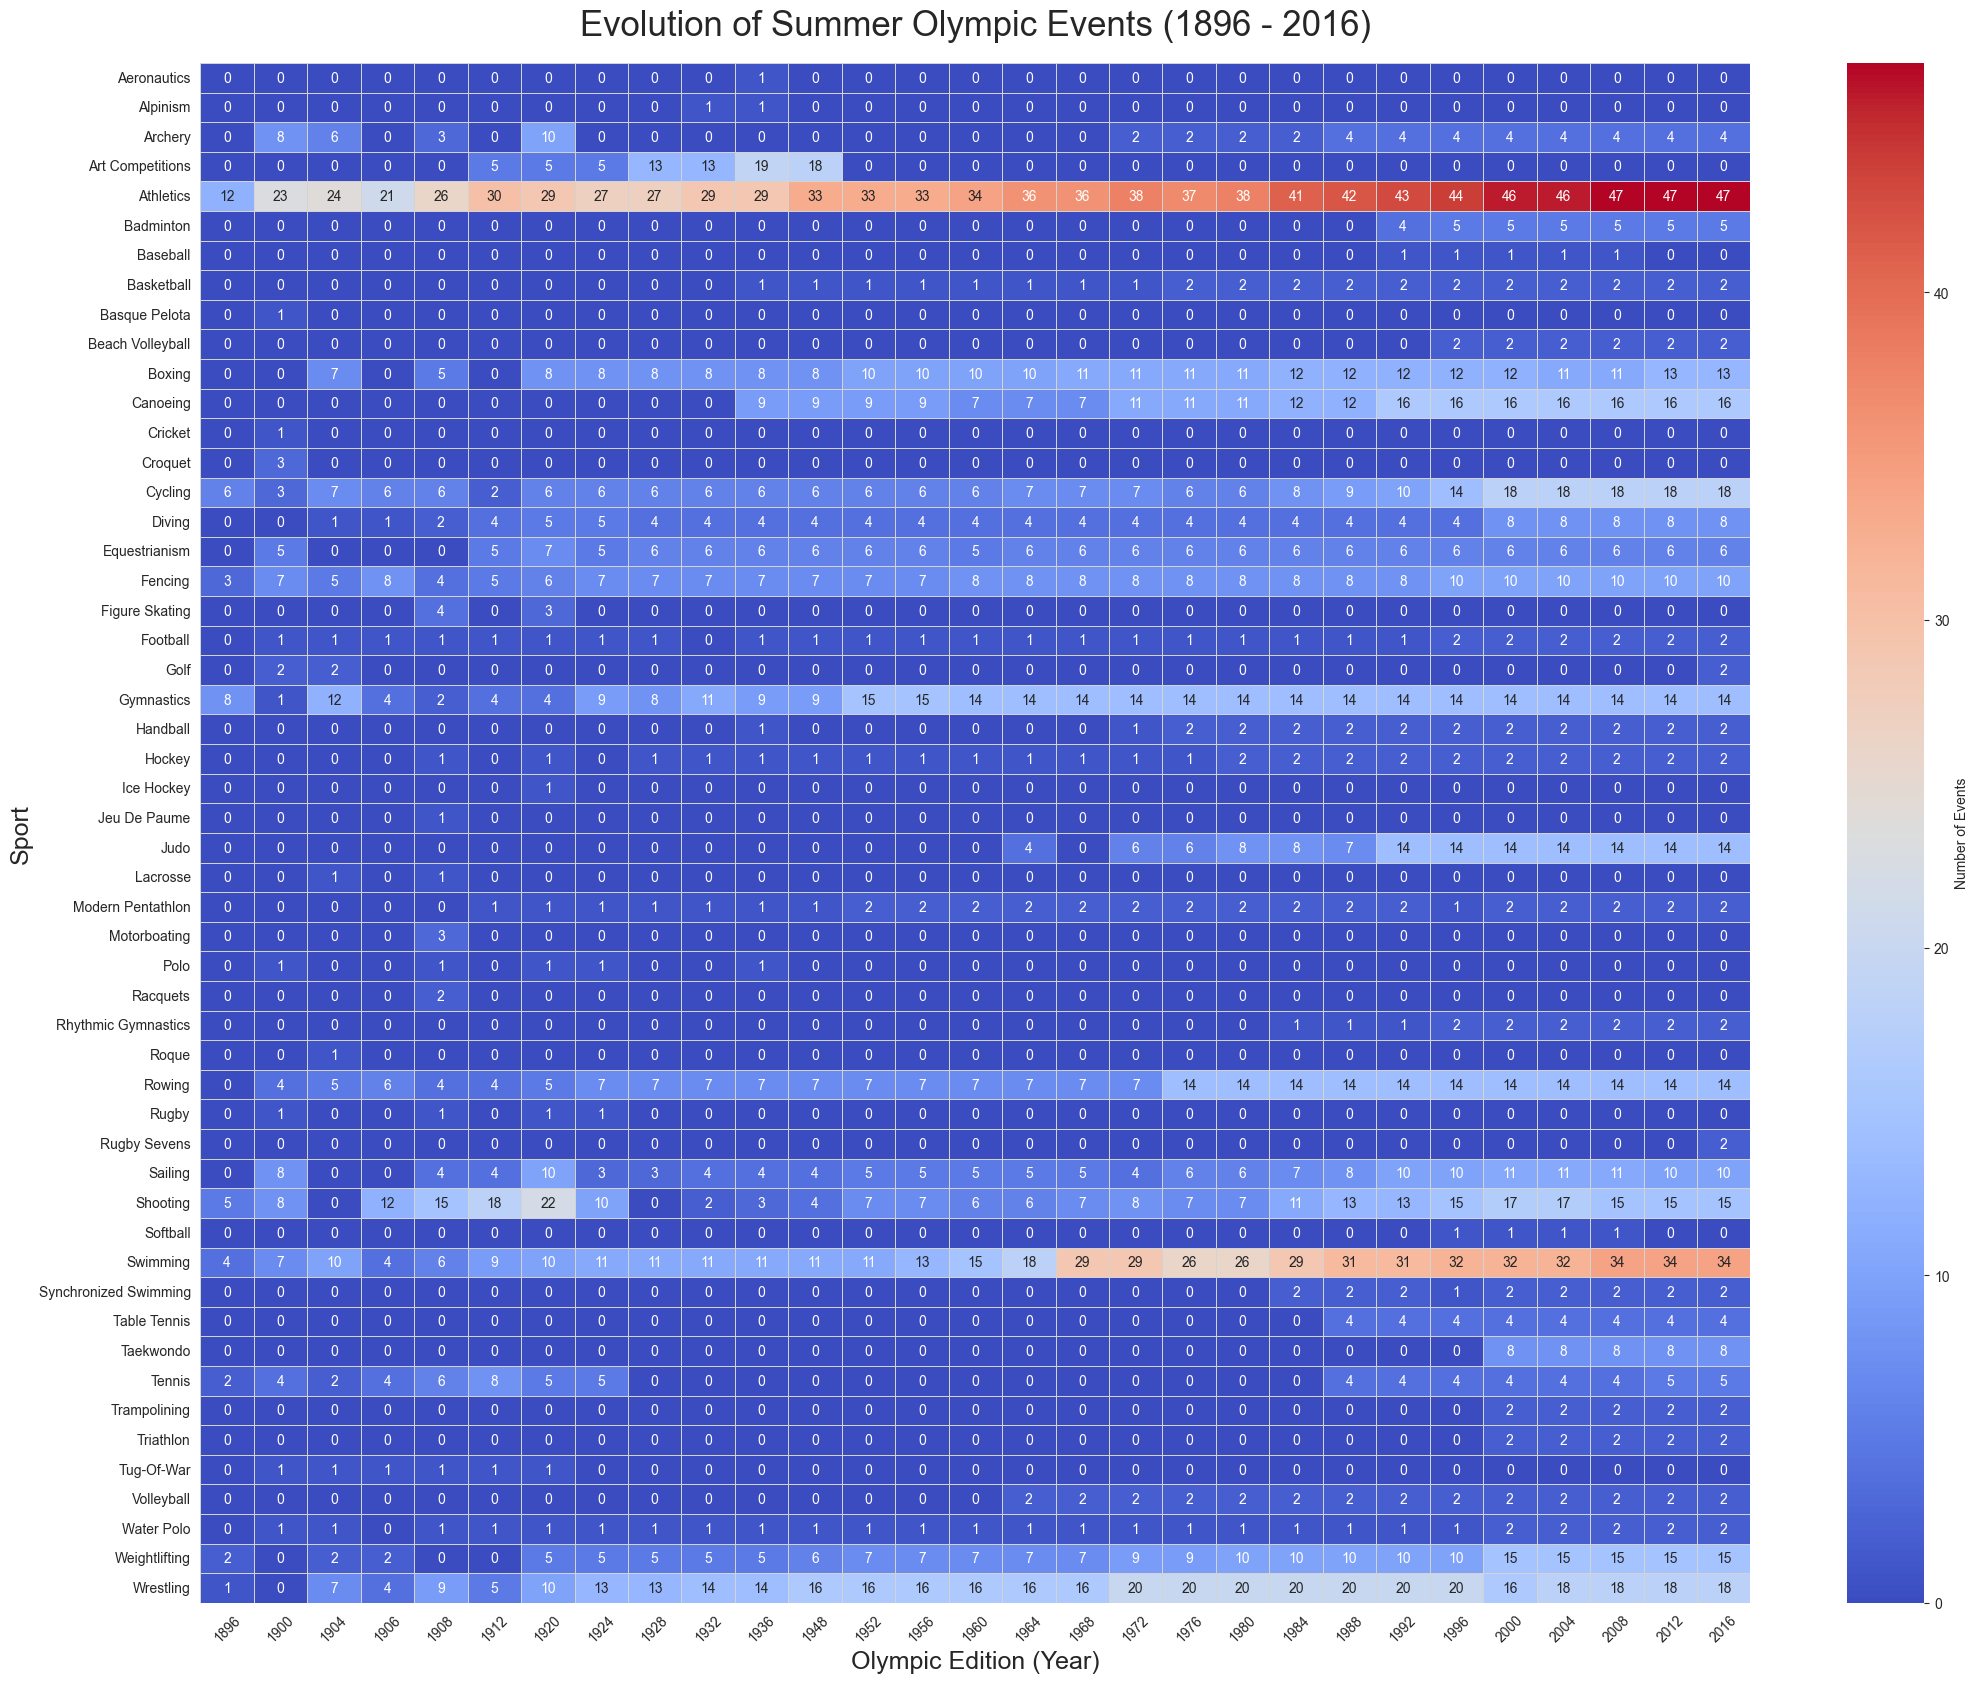

In [577]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_copy.drop_duplicates(['Year' , 'Sport' , 'Event'])
events_over_years = x.pivot_table(index = 'Sport' , values='Event'  , columns='Year', aggfunc='count' , fill_value=0)
sns.set_style("white")
# Decoration & Plotting
plt.figure(figsize=(25, 20))
sns.heatmap(events_over_years, 
            annot=True,          # Show the numbers
            fmt="d",             # Use integers
            cmap="coolwarm",       # Aesthetic yellow-to-blue palette
            linewidths=.5,       # Thin grid lines
            linecolor='lightgrey',
            cbar_kws={'label': 'Number of Events'}) # Label for the color bar

# Professional titles and labels
plt.title('Evolution of Summer Olympic Events (1896 - 2016)', fontsize=25, pad=20)
plt.xlabel('Olympic Edition (Year)', fontsize=18)
plt.ylabel('Sport', fontsize=18)

# Rotate labels for readability
plt.xticks(rotation=45) 
plt.yticks(rotation=0) 

plt.show()